In [6]:
from __future__ import annotations

from fancyimpute import IterativeImputer
import matplotlib.gridspec as gridspec
from SpiPy.RunFlow.Backbone import *
import matplotlib.pyplot as plt
from pandas import DataFrame
from hampel import hampel
import seaborn as sns

In [7]:
df = RunFlow(
    save_data=False,
    bWorkLaptop=True,
    geo_level="municipality",
    time_interval="hours"
)
df.run()

C:\Users\VY72PC\PycharmProjects\Academia\Thesis-Code\SpiPy\RunFlow\Backbone.py:148: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = self.raw_data.groupby(by=[self.geo_lev, self.time_lev]).median().copy().reset_index()
C:\Users\VY72PC\PycharmProjects\Academia\Thesis-Code\SpiPy\RunFlow\Backbone.py:148: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = self.raw_data.groupby(by=[self.geo_lev, self.time_lev]).median().copy().reset_index()


In [8]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df.processed_data.pollution.iloc[2000:])
df.processed_data.pollution = DataFrame(imp.transform(df.processed_data.pollution.iloc[2000:]))

In [9]:
for column in df.processed_data.pollution:
    df.processed_data.pollution[column] = hampel(df.processed_data.pollution[column], window_size=3, n=3, imputation=True)

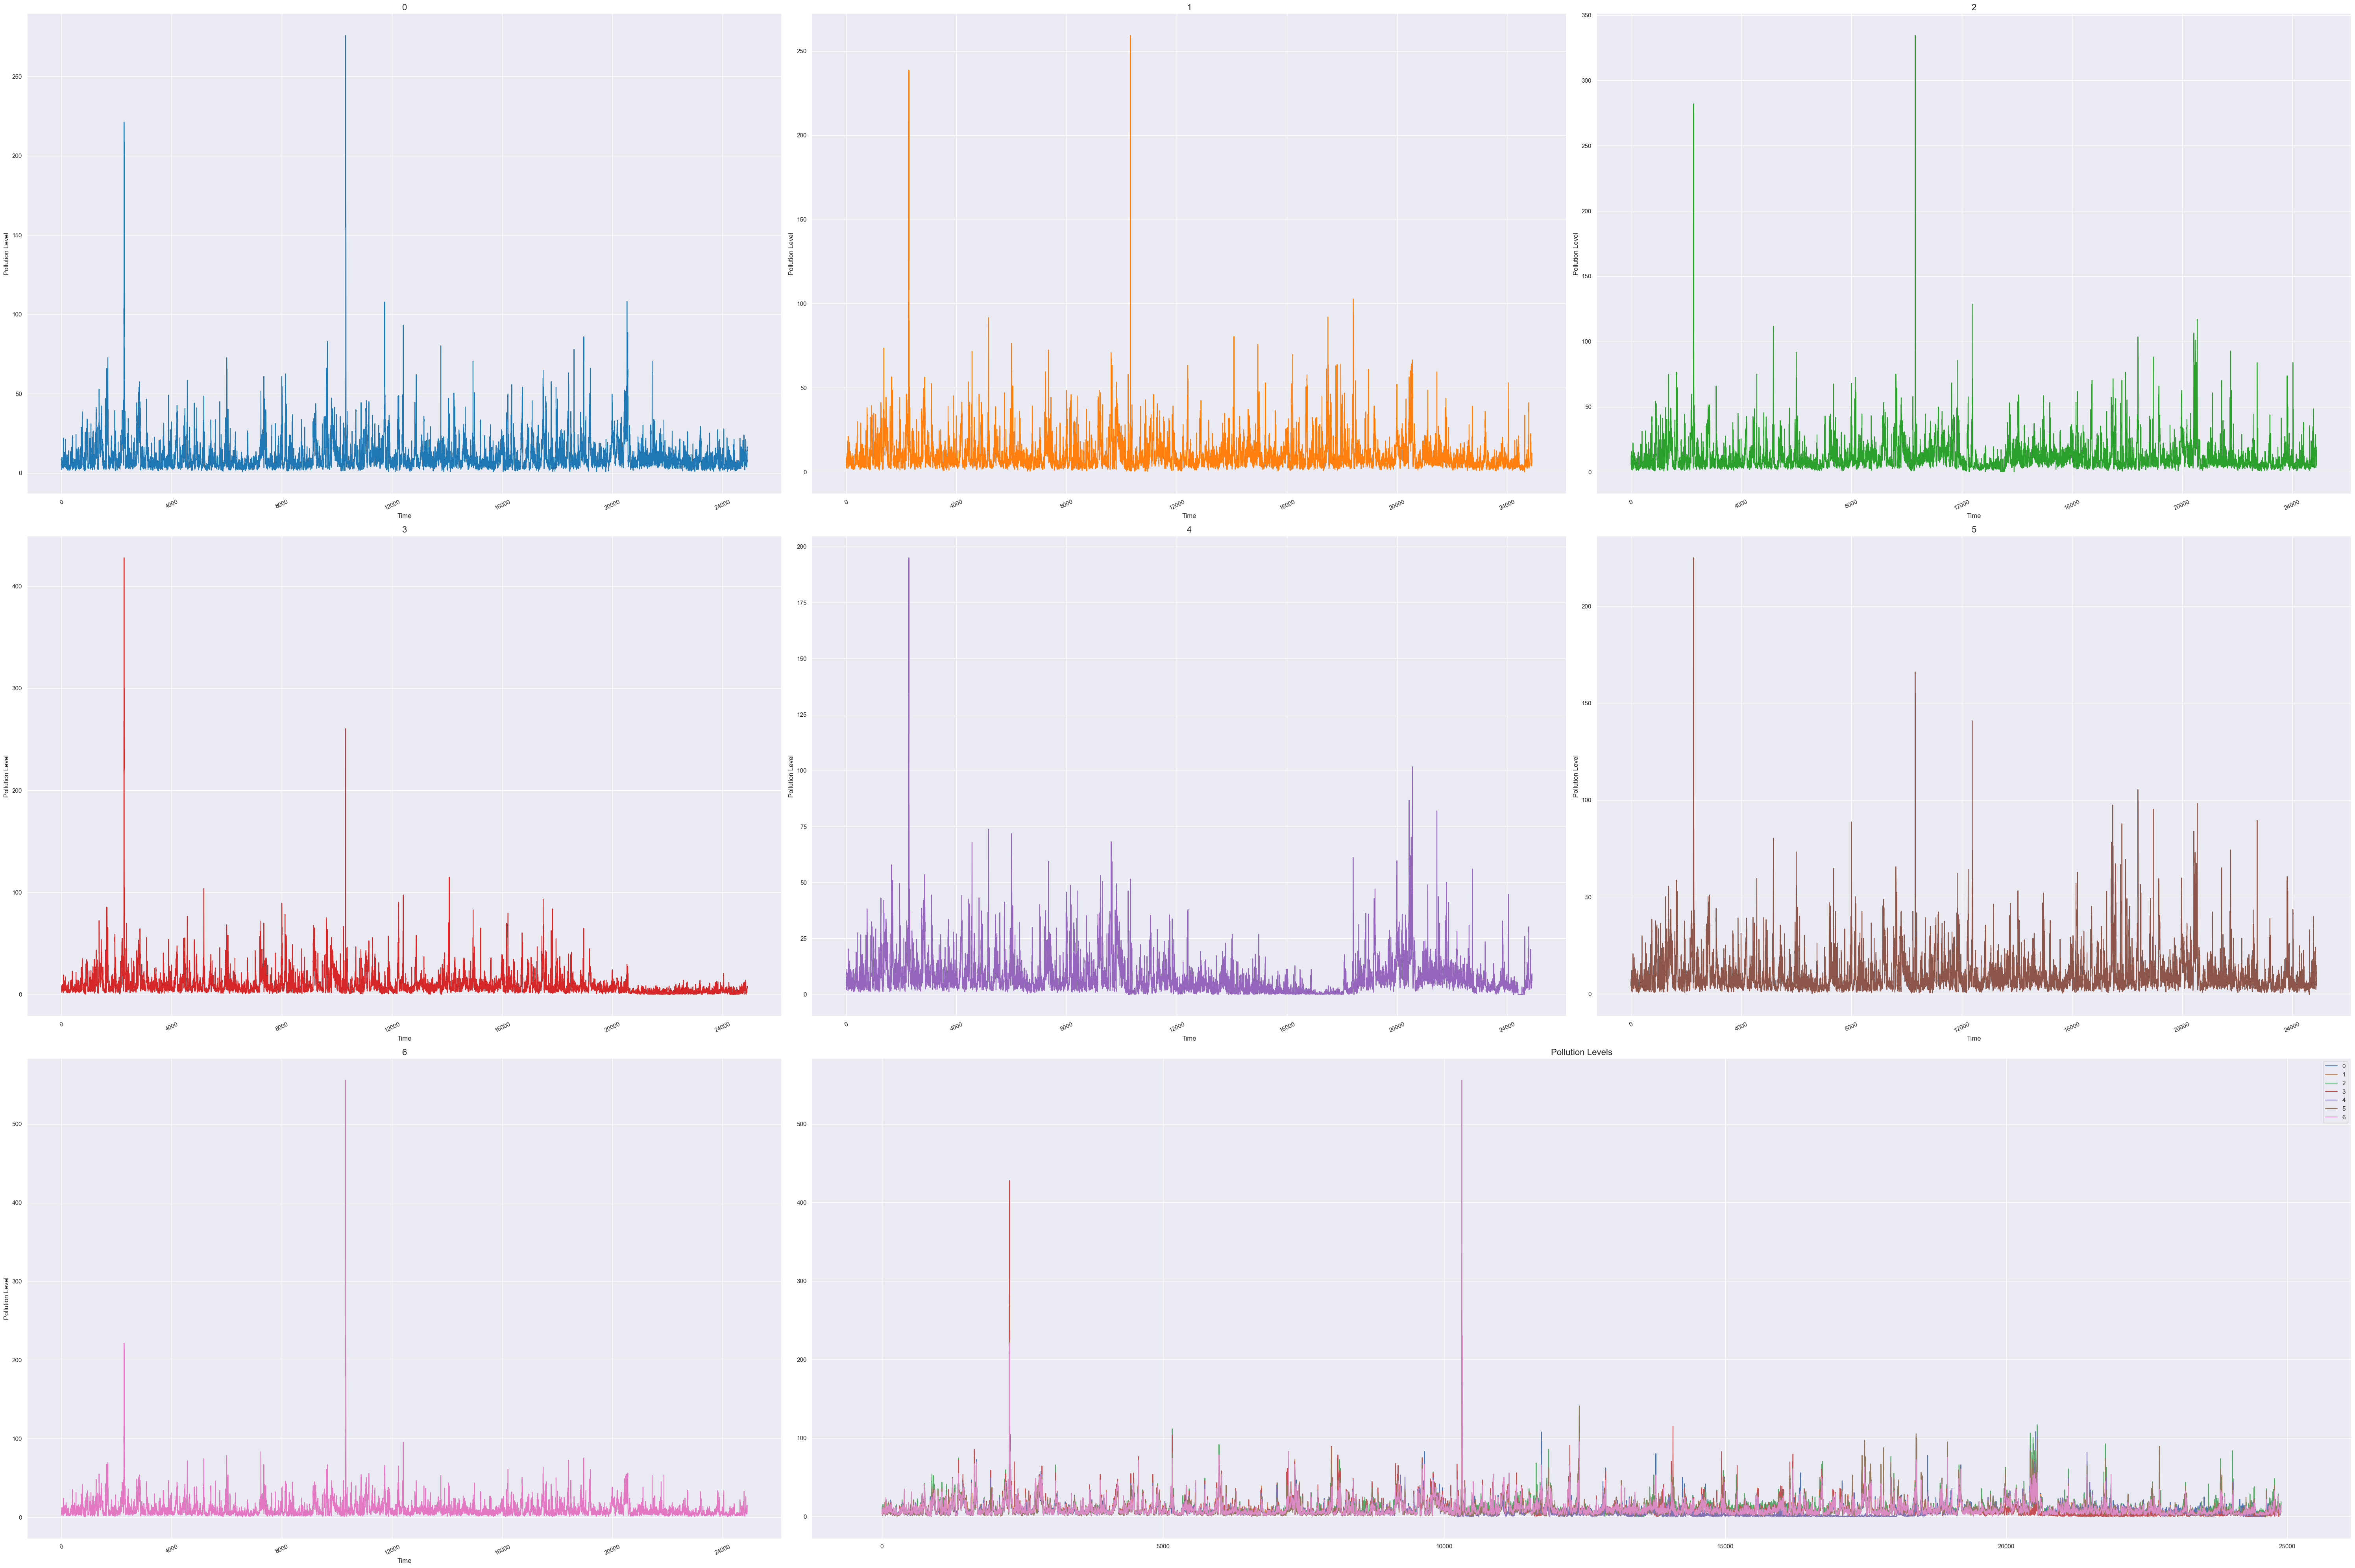

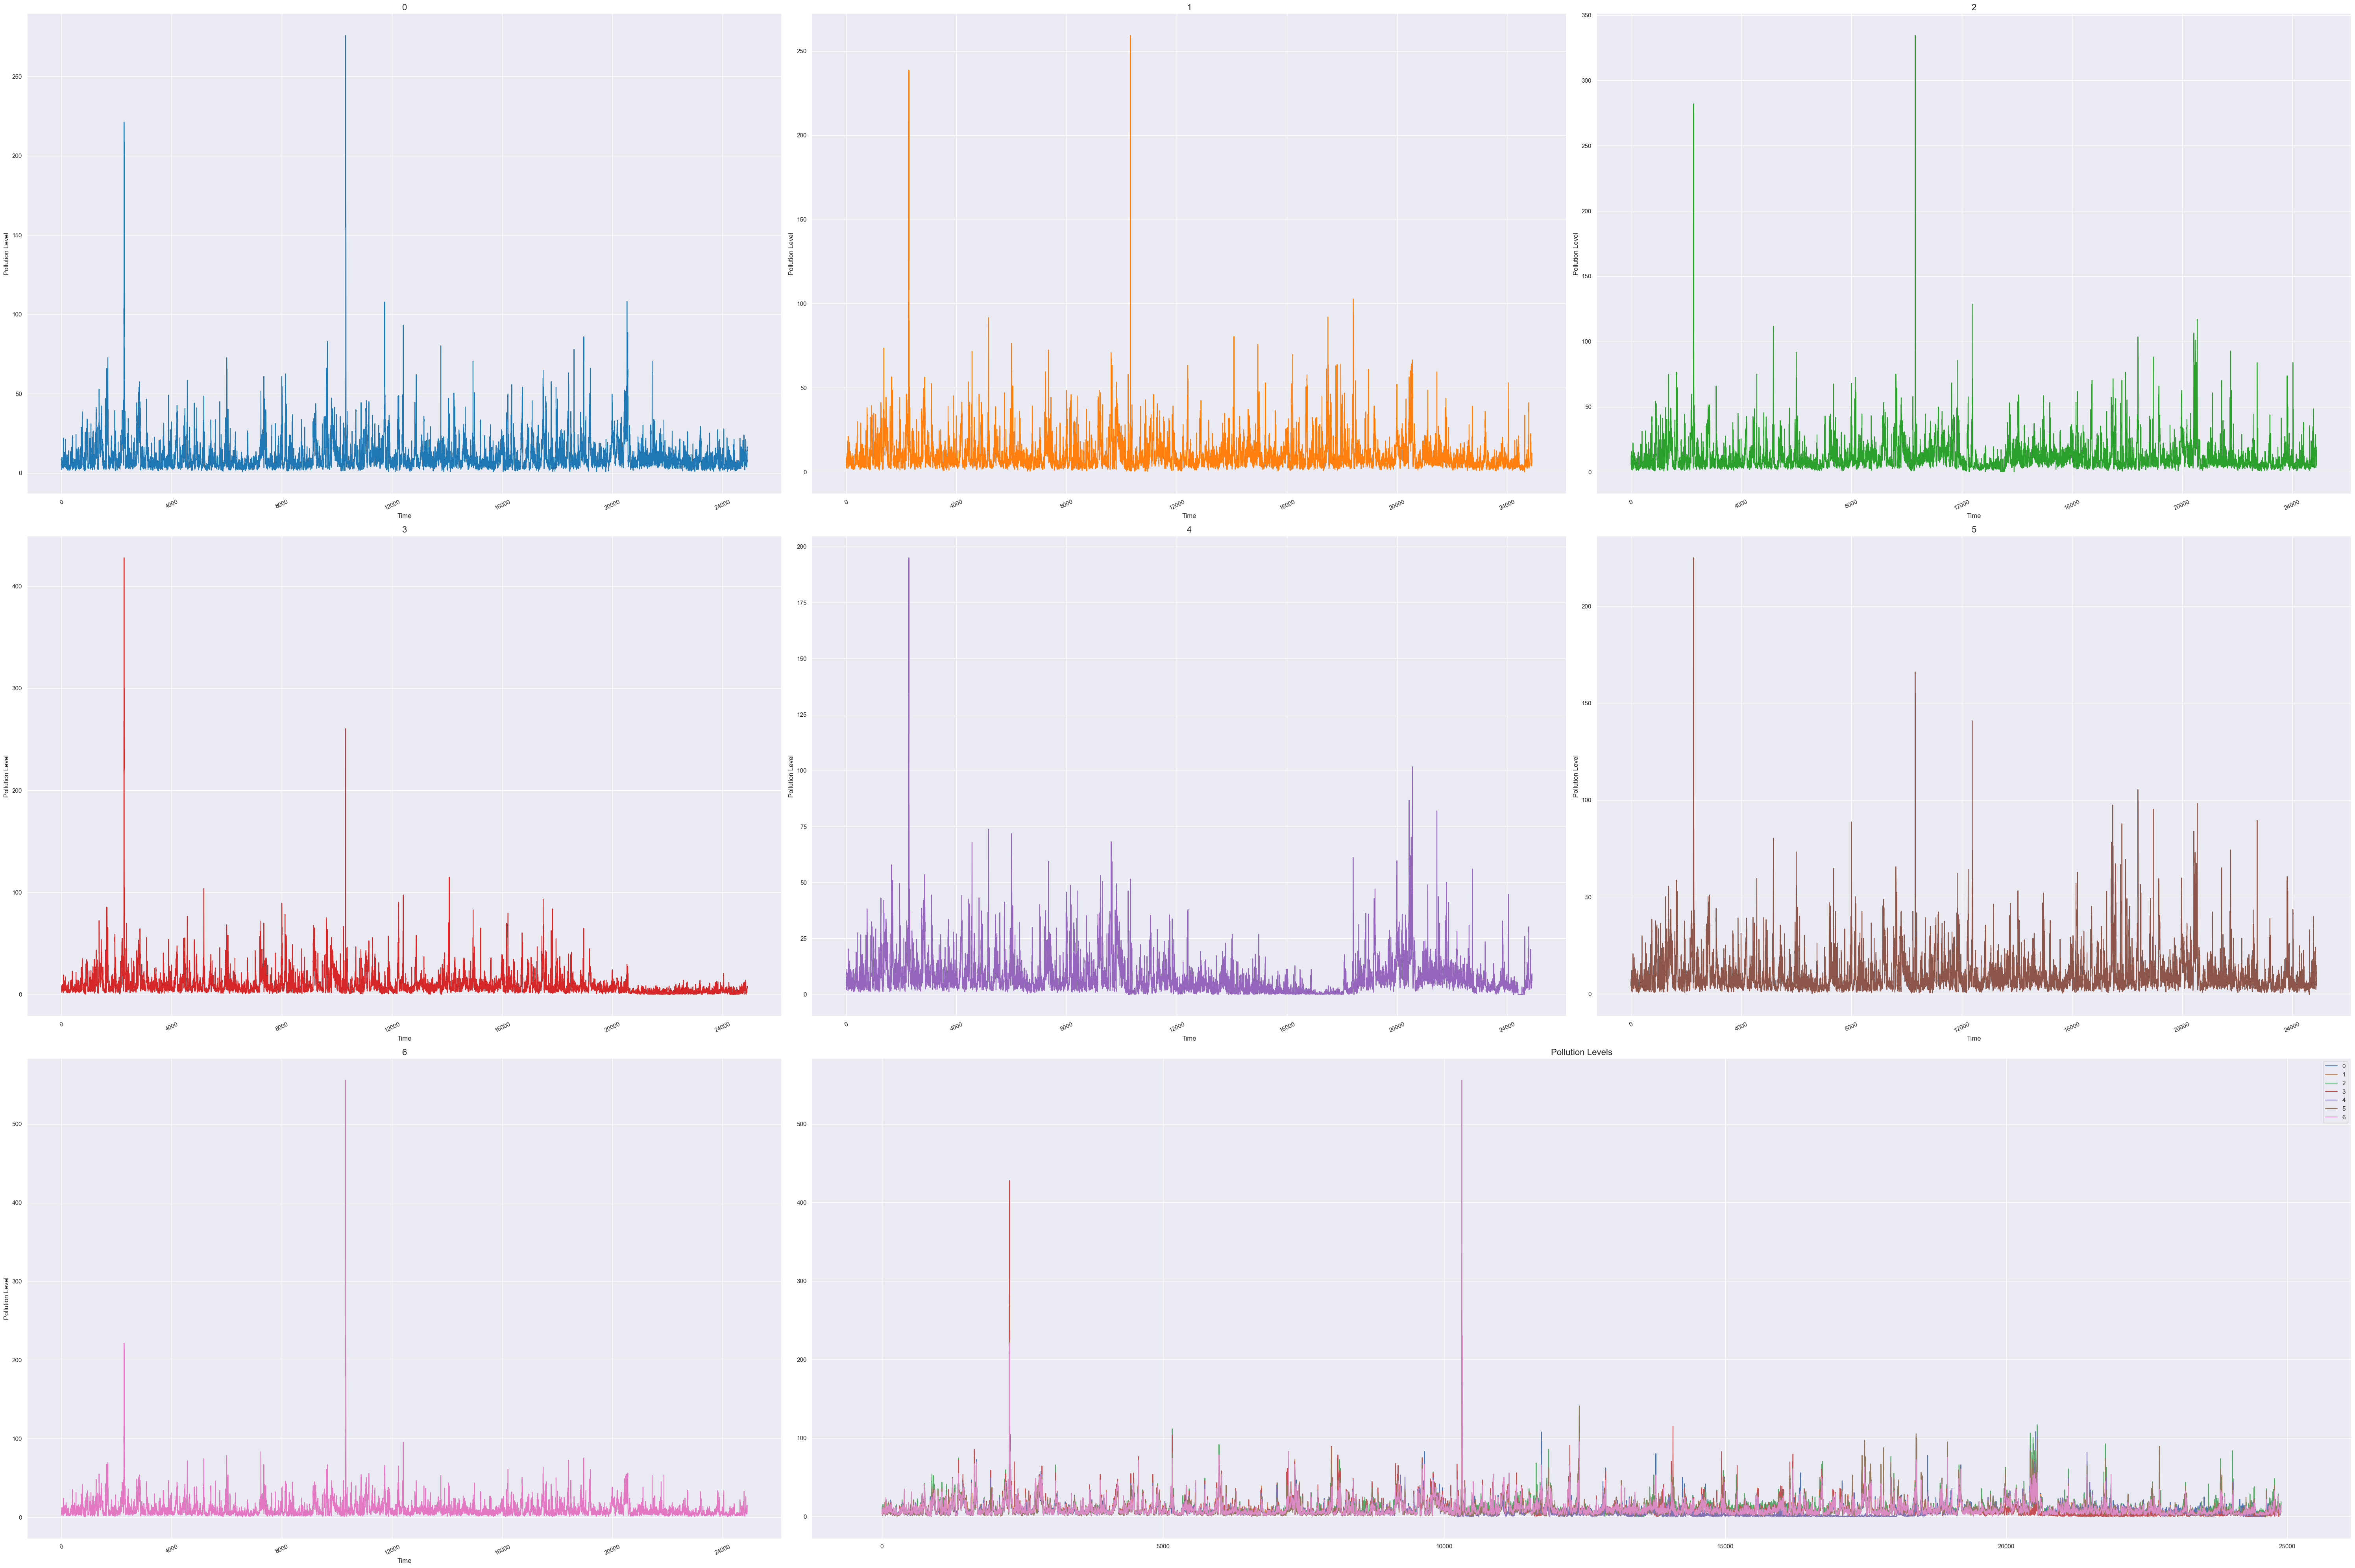

In [10]:
sns.set_theme()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']
gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize=(60, 40))

axes = []
for i in range(7):
    row = i // 3
    col = i % 3
    axes.append(fig.add_subplot(gs[row, col]))

axes.append(fig.add_subplot(gs[2, 1:]))

for ax, col_name, color in zip(axes, df.processed_data.pollution.columns, colors):
    sns.lineplot(data=df.processed_data.pollution[col_name].dropna(), ax=ax, color=color, linewidth=1.5)
    ax.set_xticks(df.processed_data.pollution.index[::4000])
    ax.set_xticklabels(df.processed_data.pollution.index[::4000], rotation=25)
    ax.set_title(col_name, fontsize=16)
    ax.set_xlabel('Time', fontsize=12)
    ax.set_ylabel('Pollution Level', fontsize=12)
    ax.grid(True)

axes[-1].plot(df.processed_data.pollution, label=df.processed_data.pollution.columns)
axes[-1].legend(df.processed_data.pollution.columns)
axes[-1].set_title('Pollution Levels', fontsize=16)

plt.tight_layout()
plt.savefig('Pol4.png')
plt.show()